In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_parami_evaluation.csv")

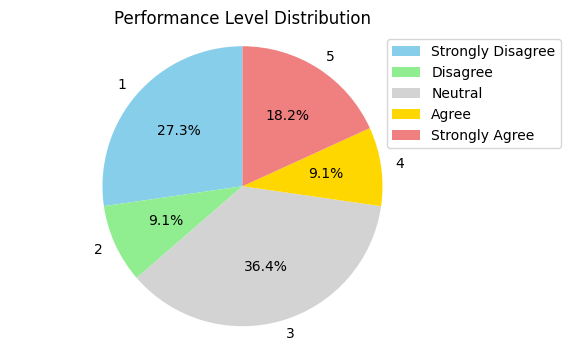

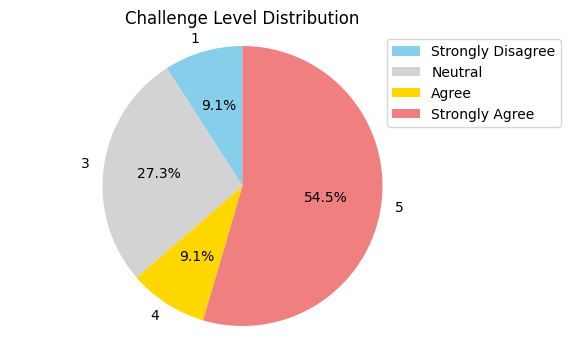

In [ ]:
#Q1 - Pie Chart

# Select relevant columns
data_subset = df[['Performance_Level', 'Course_Challenge']]

# Replace NaN values with 0
data_subset = data_subset.fillna(0)

# Convert 'Performance_Level' and 'Course_Challenge' columns to integers
data_subset['Performance_Level'] = data_subset['Performance_Level'].astype(int)
data_subset['Course_Challenge'] = data_subset['Course_Challenge'].astype(int)

# Count the number of students in each performance level
performance_counts = data_subset['Performance_Level'].value_counts().sort_index()
challenge_counts = data_subset['Course_Challenge'].value_counts().sort_index()

# Plotting the Pie Chart for Performance
performance_labels = performance_counts.index
performance_sizes = performance_counts.values
performance_colors = ['skyblue', 'lightgreen', 'lightgrey', 'gold', 'lightcoral']

plt.figure(figsize=(6, 4))
plt.pie(performance_sizes, labels=performance_labels, colors=performance_colors, autopct='%1.1f%%', startangle=90)

# Add legend
legend_labels = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']
plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.2, 1))

plt.title('Performance Level Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.show()

# Plotting the Pie Chart for Course Challenge
challenge_labels = challenge_counts.index
challenge_sizes = challenge_counts.values
challenge_colors = ['skyblue', 'lightgrey', 'gold', 'lightcoral']

plt.figure(figsize=(6, 4))
plt.pie(challenge_sizes, labels=challenge_labels, colors=challenge_colors, autopct='%1.1f%%', startangle=90)

# Add legend
legend_labels = ['Strongly Disagree', 'Neutral', 'Agree', 'Strongly Agree']
plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.2, 1))

plt.title('Challenge Level Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.show()

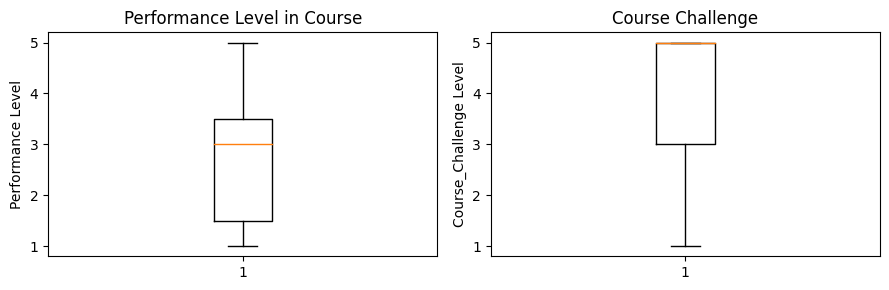

In [ ]:
#Q1 - Boxplots

# Select the columns related to effort and preparation
performance_column = 'Performance_Level'
challenge_column = 'Course_Challenge'

# Create a figure and axis for the boxplot
fig, axs = plt.subplots(1, 2, figsize=(9, 3))

# Boxplot for effort evaluation
axs[0].boxplot(df[performance_column].dropna())
axs[0].set_title('Performance Level in Course')
axs[0].set_ylabel('Performance Level')

# Boxplot for preparation evaluation
axs[1].boxplot(df[challenge_column].dropna())
axs[1].set_title('Course Challenge')
axs[1].set_ylabel('Course_Challenge Level')

plt.tight_layout()
plt.show()

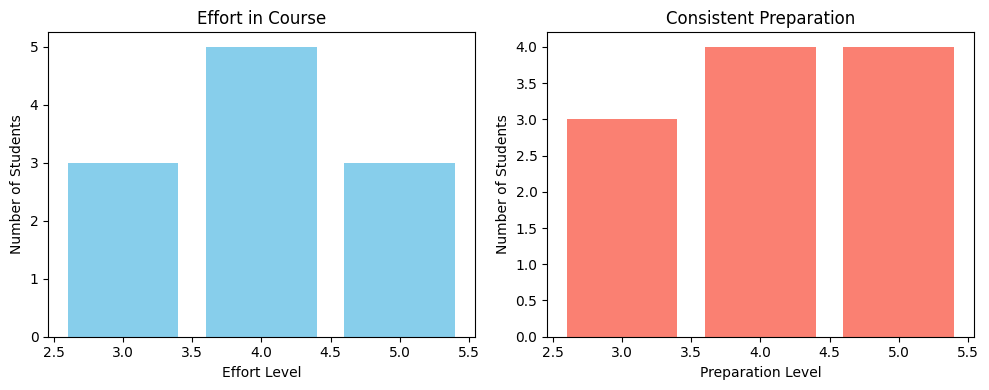

In [ ]:
#Q2 - Bar Graphs

# Aggregate counts of responses for each level of effort and preparation
effort_counts = df['Effort_Course'].value_counts()
prep_counts = df['Preparedness_Class'].value_counts()

# Create a figure with subplots for effort and preparation evaluations
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot for effort evaluation
axs[0].bar(effort_counts.index, effort_counts.values, color='skyblue')
axs[0].set_title('Effort in Course')
axs[0].set_xlabel('Effort Level')
axs[0].set_ylabel('Number of Students')

# Plot for preparation evaluation
axs[1].bar(prep_counts.index, prep_counts.values, color='salmon')
axs[1].set_title('Consistent Preparation')
axs[1].set_xlabel('Preparation Level')
axs[1].set_ylabel('Number of Students')

plt.tight_layout()
plt.show()

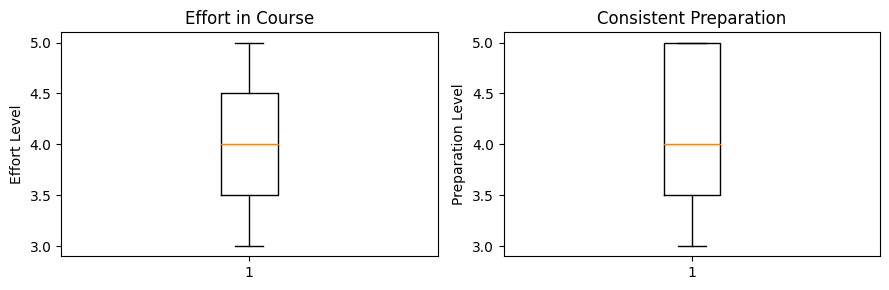

In [ ]:
#Q2 - Boxplots

# Select the columns related to effort and preparation
effort_column = 'Effort_Course'
prep_column = 'Preparedness_Class'

# Create a figure and axis for the boxplot
fig, axs = plt.subplots(1, 2, figsize=(9, 3))

# Boxplot for effort evaluation
axs[0].boxplot(df[effort_column].dropna())
axs[0].set_title('Effort in Course')
axs[0].set_ylabel('Effort Level')

# Boxplot for preparation evaluation
axs[1].boxplot(df[prep_column].dropna())
axs[1].set_title('Consistent Preparation')
axs[1].set_ylabel('Preparation Level')

plt.tight_layout()
plt.show()

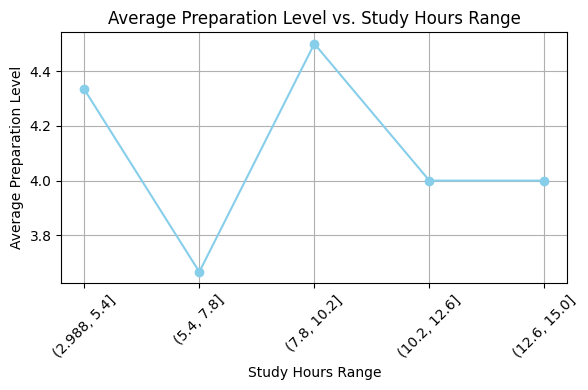

In [ ]:
#Q3
study_hours_column = 'Study_Hours_Per_Week'
prep_column = 'Preparedness_Class'

# Group the data by study hours and calculate the mean preparation level for each study hour range
df[study_hours_column] = pd.to_numeric(df[study_hours_column], errors='coerce')

# Drop rows with missing values in the selected columns
df_subset = df[[study_hours_column, prep_column]].dropna()
study_hours_groups = df_subset.groupby(pd.cut(df_subset[study_hours_column], bins=5))[prep_column].mean()

# Extracting data for plotting
study_hours_ranges = [str(group) for group in study_hours_groups.index]
prep_levels = study_hours_groups.values

# Create a line plot
plt.figure(figsize=(6, 4))
plt.plot(study_hours_ranges, prep_levels, marker='o', linestyle='-', color='skyblue')
plt.title('Average Preparation Level vs. Study Hours Range')
plt.xlabel('Study Hours Range')
plt.ylabel('Average Preparation Level')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

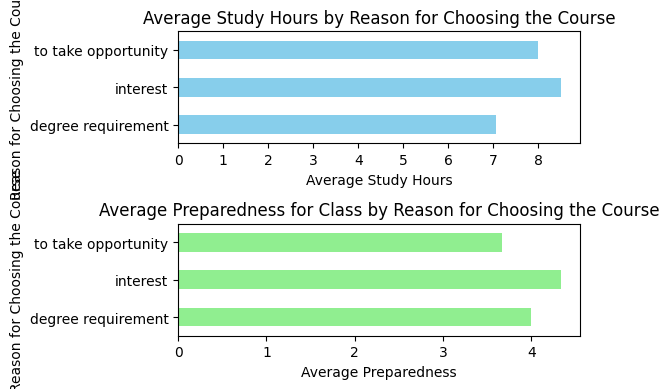

In [ ]:
#Q4
study_hours_column = 'Study_Hours_Per_Week'
prep_column = 'Preparedness_Class'
reason_column = 'Reason'
df[study_hours_column] = pd.to_numeric(df[study_hours_column], errors='coerce')

# Drop rows with missing values in the selected columns
df_subset = df[[study_hours_column, prep_column, reason_column]].dropna()

# Group the data by reason and calculate the mean study hours and preparedness for each reason
reason_groups = df_subset.groupby(reason_column)[[study_hours_column, prep_column]].mean()

# Create a figure with two subplots for study hours and preparedness
fig, axs = plt.subplots(2, 1, figsize=(6, 4))

# Horizontal bar graph for average study hours
reason_groups[study_hours_column].plot(kind='barh', color='skyblue', ax=axs[0])
axs[0].set_title('Average Study Hours by Reason for Choosing the Course')
axs[0].set_xlabel('Average Study Hours')
axs[0].set_ylabel('Reason for Choosing the Course')

# Horizontal bar graph for average preparedness
reason_groups[prep_column].plot(kind='barh', color='lightgreen', ax=axs[1])
axs[1].set_title('Average Preparedness for Class by Reason for Choosing the Course')
axs[1].set_xlabel('Average Preparedness')
axs[1].set_ylabel('Reason for Choosing the Course')

plt.tight_layout()
plt.show()

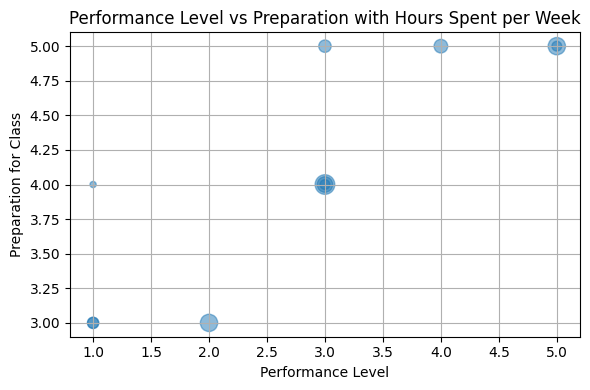

In [ ]:
performance_column = 'Performance_Level'
preparation_column = 'Preparedness_Class'
hours_spent_column = 'Study_Hours_Per_Week'

# Remove rows with missing values in the selected columns
df_subset = df[[performance_column, preparation_column, hours_spent_column]].dropna()

# Normalize the hours spent per week to be used as bubble sizes
min_size = 20  # minimum bubble size
max_size = 200  # maximum bubble size
df_subset['bubble_sizes'] = ((df_subset[hours_spent_column] - df_subset[hours_spent_column].min()) /
                             (df_subset[hours_spent_column].max() - df_subset[hours_spent_column].min())) * (
                                    max_size - min_size) + min_size

# Create a bubble chart
plt.figure(figsize=(6, 4))
plt.scatter(df_subset[performance_column], df_subset[preparation_column],
            s=df_subset['bubble_sizes'], alpha=0.5)
plt.title('Performance Level vs Preparation with Hours Spent per Week')
plt.xlabel('Performance Level')
plt.ylabel('Preparation for Class')
plt.grid(True)
plt.tight_layout()
plt.show()

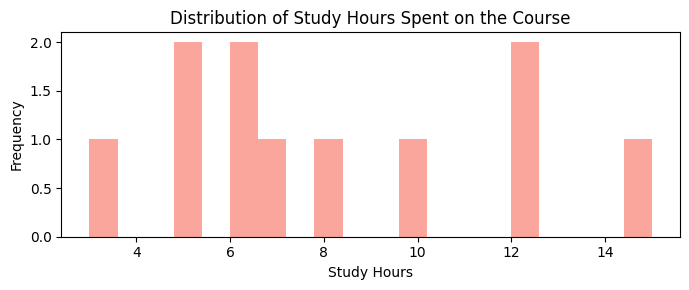

In [ ]:
#Q6
study_hours_column = 'Study_Hours_Per_Week'  # Replace this with the actual column name

# Filtering out rows with missing values in the study hours column
study_hours_data = df[study_hours_column].dropna()

# Create a histogram for study hours
plt.figure(figsize=(7, 3))
plt.hist(study_hours_data, bins=20, color='salmon', alpha=0.7)
plt.title('Distribution of Study Hours Spent on the Course')
plt.xlabel('Study Hours')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

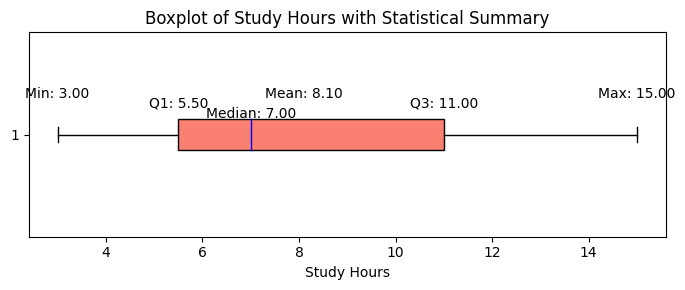

In [ ]:
#Q6
study_hours_column = 'Study_Hours_Per_Week'
study_hours_data = df[study_hours_column].dropna()

# Create a boxplot for study hours and display statistics
plt.figure(figsize=(7, 3))
plt.boxplot(study_hours_data, vert=False, patch_artist=True,
            boxprops=dict(facecolor='salmon'), medianprops=dict(color='blue'))

# Calculating statistics
statistics = study_hours_data.describe()

# display statistics as annotations to the boxplot
plt.text(statistics['mean'], 1.2, f"Mean: {statistics['mean']:.2f}", ha='center', va='center', color='black')
plt.text(statistics['25%'], 1.15, f"Q1: {statistics['25%']:.2f}", ha='center', va='center', color='black')
plt.text(statistics['50%'], 1.1, f"Median: {statistics['50%']:.2f}", ha='center', va='center', color='black')
plt.text(statistics['75%'], 1.15, f"Q3: {statistics['75%']:.2f}", ha='center', va='center', color='black')
plt.text(statistics['min'], 1.2, f"Min: {statistics['min']:.2f}", ha='center', va='center', color='black')
plt.text(statistics['max'], 1.2, f"Max: {statistics['max']:.2f}", ha='center', va='center', color='black')

plt.title('Boxplot of Study Hours with Statistical Summary')
plt.xlabel('Study Hours')

plt.tight_layout()
plt.show()

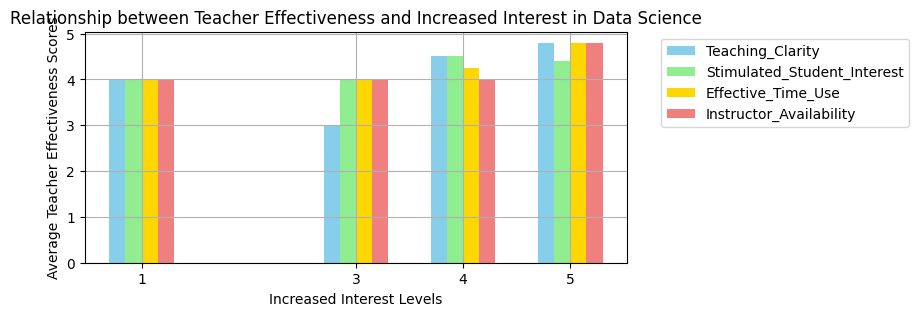

In [ ]:
#Q7 and Q8
columns_of_interest = ['Teaching_Clarity', 'Stimulated_Student_Interest',
                       'Effective_Time_Use', 'Instructor_Availability',
                       'Instructor_Caring', 'Increased_Interest']

# Creating a new DataFrame with the selected columns
selected_data = df[columns_of_interest]

# Calculating average increased interest scores for each teacher effectiveness criterion
avg_interest_by_effectiveness = selected_data.groupby('Increased_Interest').mean()

# Plotting bar graphs for each teacher effectiveness criterion side by side
plt.figure(figsize=(7, 3))

num_columns = len(avg_interest_by_effectiveness.columns[:-1])  # Excluding Increased_Interest column
bar_width = 0.15  # Width of each bar
colors = ['skyblue', 'lightgreen', 'gold', 'lightcoral']

for i, column in enumerate(avg_interest_by_effectiveness.columns[:-1]):
    x_values = avg_interest_by_effectiveness.index + (i - (num_columns - 1) / 2) * bar_width
    color = colors[i]
    plt.bar(x_values, avg_interest_by_effectiveness[column], color=color, width=bar_width, label=column)

plt.xlabel('Increased Interest Levels')
plt.ylabel('Average Teacher Effectiveness Scores')
plt.title('Relationship between Teacher Effectiveness and Increased Interest in Data Science')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(avg_interest_by_effectiveness.index)
plt.show()

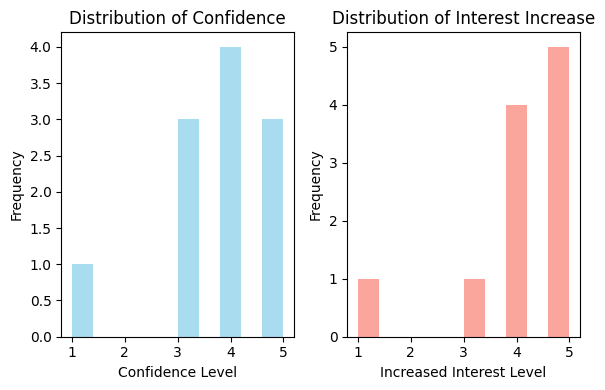

In [ ]:
#Q9
confidence_column = 'Confidence_Gained'
interest_column =  'Increased_Interest'

# Filter out rows with missing values in the selected columns
df_subset = df[[confidence_column, interest_column]].dropna()

# Create a figure with two subplots for histograms
fig, axs = plt.subplots(1, 2, figsize=(6, 4))

# Histogram for Confidence Percentage
axs[0].hist(df_subset[confidence_column], bins=10, color='skyblue', alpha=0.7)
axs[0].set_title('Distribution of Confidence')
axs[0].set_xlabel('Confidence Level')
axs[0].set_ylabel('Frequency')

# Histogram for Interest Increase Percentage
axs[1].hist(df_subset[interest_column], bins=10, color='salmon', alpha=0.7)
axs[1].set_title('Distribution of Interest Increase')
axs[1].set_xlabel('Increased Interest Level')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

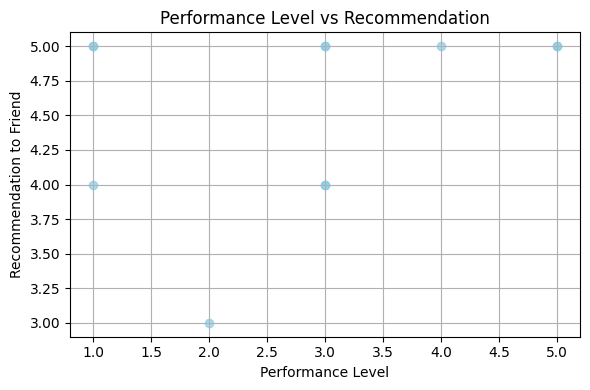

In [ ]:
#Q10 - Scatterplot
performance_column = 'Performance_Level'
recommendation_column = 'Recommendation'

#Remove rows with missing values in the selected columns
df_subset = df[[performance_column, recommendation_column]].dropna()

#Create a scatterplot for Performance Level vs Recommendation
plt.figure(figsize=(6, 4))
plt.scatter(df_subset[performance_column], df_subset[recommendation_column], color='skyblue', alpha=0.7)
plt.title('Performance Level vs Recommendation')
plt.xlabel('Performance Level')
plt.ylabel('Recommendation to Friend')
plt.grid(True)
plt.tight_layout()
plt.show()

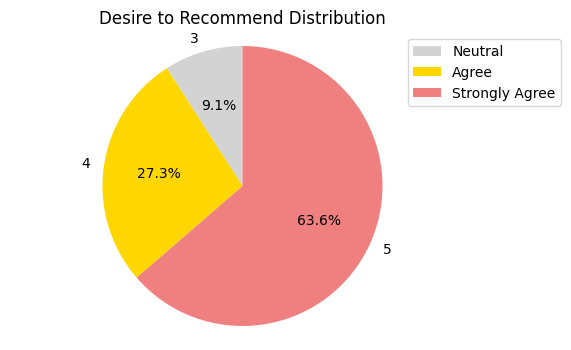

In [ ]:
#Q10 - Pie Chart

# Select relevant columns
recommendation_column = 'Recommendation'
data_subset = df[[recommendation_column]]

# Replace NaN values with 0
data_subset = data_subset.fillna(0)

# Count the number of students in each performance level
recommendation_counts = data_subset[recommendation_column].value_counts().sort_index()

# Plotting the Pie Chart for Course Challenge
recommendation_labels = recommendation_counts.index
recommendation__sizes = recommendation_counts.values
colors = ['lightgrey', 'gold', 'lightcoral']

plt.figure(figsize=(6, 4))
plt.pie(recommendation__sizes, labels=recommendation_labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add legend
legend_labels = ['Neutral', 'Agree', 'Strongly Agree']
plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.2, 1))

plt.title('Desire to Recommend Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.show()

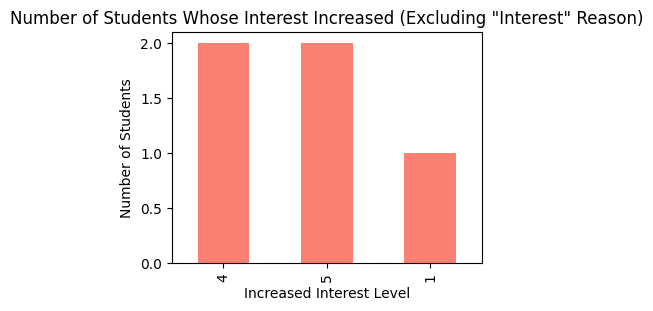

In [ ]:
# Filter the data to exclude students with the reason 'Interest'
filtered_data = df[df['Reason'] != 'interest']

# Count the number of students who answered that the course increased their interest
interest_counts = filtered_data['Increased_Interest'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(4, 3))
interest_counts.plot(kind='bar', color='salmon')

# Customizing the plot
plt.title('Number of Students Whose Interest Increased (Excluding "Interest" Reason)')
plt.xlabel('Increased Interest Level')
plt.ylabel('Number of Students')
plt.show()

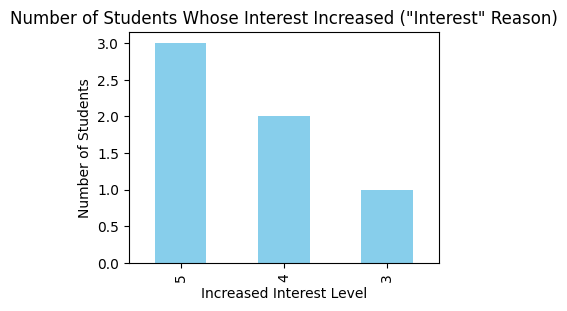

In [ ]:
# Filter the data to exclude students with the reason 'Interest'
filtered_data = df[df['Reason'] == 'interest']

# Count the number of students who answered that the course increased their interest
interest_counts = filtered_data['Increased_Interest'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(4, 3))
interest_counts.plot(kind='bar', color='skyblue')

# Customizing the plot
plt.title('Number of Students Whose Interest Increased ("Interest" Reason)')
plt.xlabel('Increased Interest Level')
plt.ylabel('Number of Students')
plt.show()